# Pingouin Library
- https://pingouin-stats.org/build/html/index.html

In [3]:
#!pip install pingouin

## T- Tests
- pg.ttest(data_group1, data_group2, correction = True/False)
- data_group1: First data group-
- data_group2: Second data group
- correction = "True": The standard independent two sample t-test will be conducted by taking into consideration the homogeneity assumption.
- correction = "False": The Welch’s t-test will be conducted by not taking into consideration the homogeneity assumption.

In [1]:
import numpy as np
import pingouin as pg

In [2]:
np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

In [3]:
print('X= ', x, '\nY= ', y)

X=  [4.52499109 4.42053181 3.77897093 6.36230346 3.25533028 4.64956937
 2.95178623 4.59135733 1.04899568 2.92923908 2.67380187 4.31118852
 5.40671611 3.82758588 4.51066978 5.48020001 5.89750199 3.24810462
 3.68967198 4.65983923 5.492979   4.09301762 3.7024475  1.67554352
 2.12366377 5.62202531 2.79728088 3.49523787 2.41851903 2.18400827] 
Y=  [6.41704397 4.07326086 6.25606067 6.97867234 3.4800941  5.5648591
 3.38033491 5.20286174 4.00491662 4.2746547  5.00715313 6.36288199
 5.83629382 3.54973502 4.73989277 3.97706582 6.27151276 4.09280014
 5.30523709 5.91352322 4.94770443 5.60624519 4.69186599 3.04486339
 5.12552003 5.69290489 3.08347187 5.45166315 4.98813694 4.14050216]


In [4]:
# T-test
pg.ttest(x, y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


In [6]:
pg.ttest(x, y, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,55.783456,two-sided,0.001248,"[-1.68, -0.43]",0.878059,26.155,0.916807


In [7]:
pg.ttest(x, y, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


In [10]:
x1 = [ 20,23,24,26,27]
y1 = [34,22, 35, 43, 54]
print(x1, y1)

[20, 23, 24, 26, 27] [34, 22, 35, 43, 54]


In [11]:
pg.ttest(x1, y1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.50142,8,two-sided,0.03686,"[-26.14, -1.06]",1.582037,2.24,0.593556


In [13]:
print(np.mean(x1), np.mean(y1))

24.0 37.6


## Pearson’s correlation

In [14]:
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.000527,69.723,0.950373


## correlation

In [15]:
# Introduce an outlier
x[5] = 18

In [16]:
# Use the robust biweight midcorrelation
pg.corr(x, y, method="bicor")

,n,r,CI95%,p-val,power
bicor,30,0.575834,"[0.27, 0.78]",0.000869,0.932799


##  normality 
- function works with lists, arrays, or pandas DataFrame in wide or long-format.

In [17]:
print(pg.normality(x))                                    # Univariate normality

          W          pval  normal
0  0.615321  1.128499e-07   False


In [18]:
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

HZResults(hz=1.6967733646126668, pval=0.00018201726664169373, normal=False)


In [ ]:
## Q-Q plot

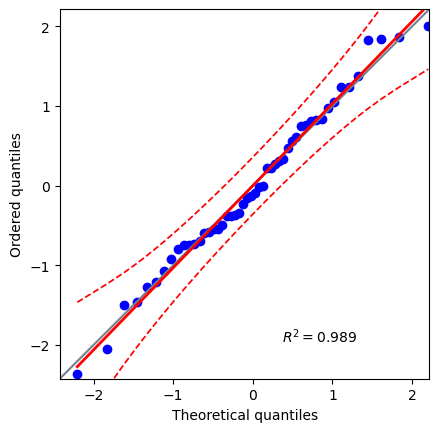

In [19]:
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

In [ ]:
## One-way ANOVA using a pandas DataFrame

In [20]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In [21]:
# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


In [ ]:
## Repeated measures ANOVA

In [22]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.039981,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


## Post-hoc tests corrected for multiple-comparisons

In [23]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tests(data=df, dv='Scores', within='Time', subject='Subject', parametric=True, padjust='fdr_bh', effsize='hedges')

In [24]:
# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ------  --------
Time        August   January  True      True          -1.740  59.000  two-sided        0.087     0.131  fdr_bh       0.582    -0.328
Time        August   June     True      True          -2.743  59.000  two-sided        0.008     0.024  fdr_bh       4.232    -0.483
Time        January  June     True      True          -1.024  59.000  two-sided        0.310     0.310  fdr_bh       0.232    -0.170



## Two-way mixed ANOVA

In [26]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time', subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



## Pairwise correlations between columns of a dataframe

In [29]:
import pandas as pd
np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T
z = np.random.normal(5, 1, 30)

In [30]:
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
data.head()

,X,Y,Z
0,4.524991,6.417044,4.227291
1,4.420532,4.073261,5.794863
2,3.778971,6.256061,5.314272
3,6.362303,6.978672,3.673735
4,3.255330,3.480094,6.417299


In [31]:
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,X,Y,pearson,two-sided,30,0.594785,"[0.3, 0.79]",0.000527,69.723,0.950373
1,X,Z,pearson,two-sided,30,-0.121071,"[-0.46, 0.25]",0.523926,0.276,0.097759
2,Y,Z,pearson,two-sided,30,-0.268985,"[-0.57, 0.1]",0.150622,0.609,0.306273


##  Pairwise T-test between columns of a dataframe

In [32]:
data.ptests(paired=True, stars=False)

,X,Y,Z
X,-,0.000,0.003
Y,-5.265,-,0.985
Z,-3.248,-0.019,-


## Multiple linear regression

In [33]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.110648,0.950840,4.323175,0.000187,0.393145,0.348193,2.159686,6.061611
1,X,0.466201,0.123402,3.777904,0.000794,0.393145,0.348193,0.213001,0.719401
2,Z,-0.202219,0.152780,-1.323597,0.196736,0.393145,0.348193,-0.515696,0.111259


## Mediation analysis

In [34]:
pg.mediation_analysis(data=data, x='X', m='Z', y='Y', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Z ~ X,-0.097790,0.151520,0.523926,-0.408166,0.212585,No
1,Y ~ Z,-0.272099,0.184124,0.150622,-0.649260,0.105062,No
2,Total,0.485976,0.124128,0.000527,0.231711,0.740240,Yes
3,Direct,0.466201,0.123402,0.000794,0.213001,0.719401,Yes
4,Indirect,0.019775,0.042096,0.718000,-0.029975,0.162467,No


## Contingency analysis

In [36]:
data = pg.read_dataset('chi2_independence')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


## Bland-Altman plot

In [38]:
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
print(x, y)

[10.7145313  10.20787524 10.02667831 12.43778415  9.0731148  10.67399756
  8.78718212 10.5585522   7.21574849  8.92534797  8.82905989 10.51598017
 11.39121038  9.59123296 10.40539168 11.12749341 11.90194448  9.17504031
  9.779665   10.7447106  11.31037483 10.18938676  9.68252735  7.59982874
  8.36372643 11.55617081  8.59813893  9.63369262  8.60005799  8.24293573] [12.34530794 10.25521081 12.07113848 13.16651599  9.52494003 11.61409835
  9.38310502 11.28384434  9.59879345 10.1695937  10.77188161 12.25963975
 11.98786091  9.68765594 10.86037003 10.35751025 12.45930325 10.06522346
 11.21493526 11.92409227 11.2177007  11.55229345 10.67504509  8.86097732
 10.77925257 11.89918346  9.09339974 11.30998742 10.70994546  9.91927904]


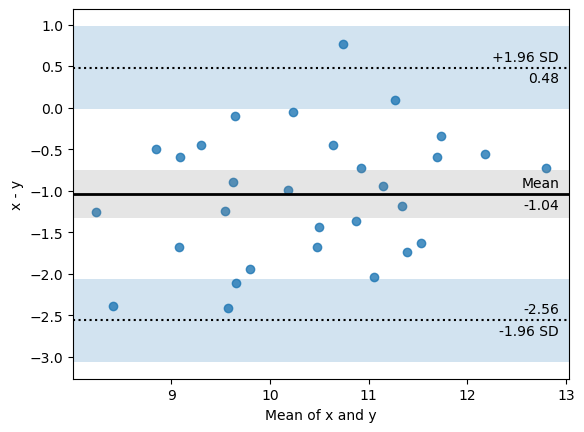

In [39]:
ax = pg.plot_blandaltman(x, y)

In [ ]:
## Plot achieved power of a paired T-test

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
sns.set(style='ticks', context='notebook', font_scale=1.2)

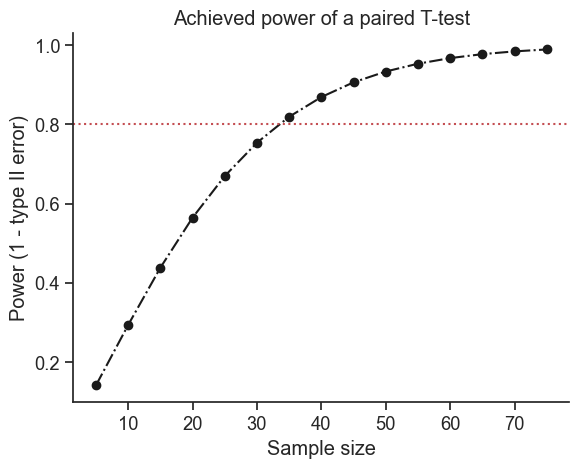

In [41]:
d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size
# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired')
# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

## Paired plot

In [42]:
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
df.head()

,Scores,Time,Group,Subject
90,5.579842,August,Meditation,30
91,5.100035,August,Meditation,31
92,4.472149,August,Meditation,32
93,4.915282,August,Meditation,33
94,6.316594,August,Meditation,34


/Users/du/anaconda3/lib/python3.12/site-packages/pingouin/plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["wthn"] = data[within].replace({_ordr: i for i, _ordr in enumerate(order)})


Text(0.5, 1.0, 'Effect of meditation on school performance')

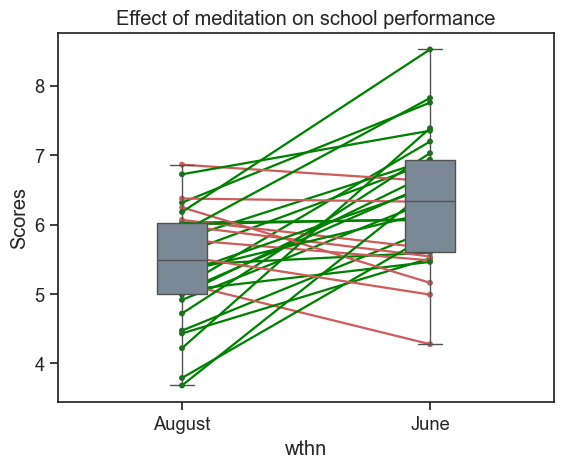

In [43]:
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject')
ax.set_title("Effect of meditation on school performance")

In [ ]:
## Integration with Panda

In [44]:
# Example 1 | ANOVA
df = pg.read_dataset('mixed_anova')
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In [45]:
df.anova(dv='Scores', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


In [46]:
# Example 2 | Pairwise correlations
data = pg.read_dataset('mediation')
data.head()

,X,M,Y,Mbin,Ybin,W1,W2
0,6,5,6,0,1,0.0,1.0
1,7,5,5,1,0,0.1,1.0
2,7,7,4,0,0,0.2,1.0
3,8,4,8,0,1,0.3,1.0
4,4,3,5,0,1,0.4,1.0


In [47]:
data.pairwise_corr(columns=['X', 'M', 'Y'], covar=['Mbin'])

,X,Y,method,covar,alternative,n,r,CI95%,p-unc
0,X,M,pearson,['Mbin'],two-sided,100,0.514160,"[0.35, 0.65]",5.225344e-08
1,X,Y,pearson,['Mbin'],two-sided,100,0.338344,"[0.15, 0.5]",6.140516e-04
2,M,Y,pearson,['Mbin'],two-sided,100,0.609681,"[0.47, 0.72]",2.118163e-11


In [48]:
# Example 3 | Partial correlation matrix
data.pcorr()

,X,M,Y,Mbin,Ybin,W1,W2
X,1.000000,0.359093,0.074315,-0.019338,-0.147393,-0.147963,-0.067496
M,0.359093,1.000000,0.555066,-0.023767,-0.111591,-0.137764,-0.175574
Y,0.074315,0.555066,1.000000,-0.001438,0.169494,0.100920,0.107903
Mbin,-0.019338,-0.023767,-0.001438,1.000000,-0.080233,-0.032491,-0.040473
Ybin,-0.147393,-0.111591,0.169494,-0.080233,1.000000,-0.000241,-0.139795
W1,-0.147963,-0.137764,0.100920,-0.032491,-0.000241,1.000000,-0.394354
W2,-0.067496,-0.175574,0.107903,-0.040473,-0.139795,-0.394354,1.000000
